In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
df= pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

## <span style="color:orange">Observation I:
-   No null Entries
-   No duplicate Entries 

### <span style="color:aqua">1. Data Manipulation

In [8]:
# Extract the 5th column and store it in ‘customer_5’
customer_5= df.iloc[:, 4]                              # 5th column will be on 4th Index as indexing starts from 0
print(customer_5)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object


In [9]:
# Extract the15thcolumnandstoreit in‘customer_15’
customer_15= df.iloc[:, 14]
print(customer_15)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object


In [10]:
cols=df.columns
cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’.
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
senior_male_electronic= df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]

In [13]:
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [14]:
# Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure= df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [15]:
# Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes= df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [16]:
# Extract 333 random records from the customer_churn dataframe and store the result in ‘customer_333’
customer_333 = df.sample(n=333, random_state=42)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [17]:
customer_333.shape

(333, 21)

In [18]:
# Get the count of different levels from the ‘Churn’ column
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### <span style="color:aqua">2. Data Visualization

In [19]:
cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of InternetService')

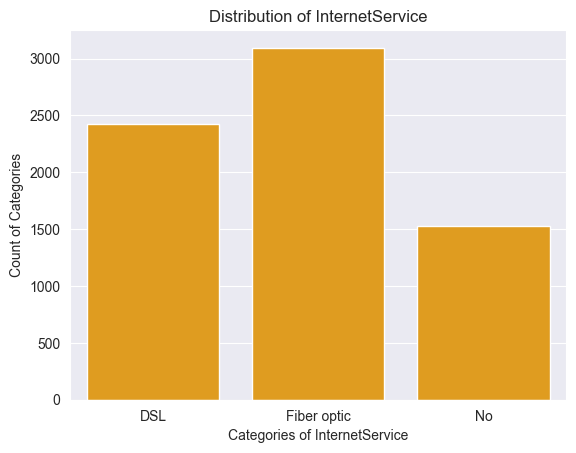

In [20]:
'''
Build a bar plot for the 'InternetService' column:
a. Set x-axis label to 'Categories of InternetService'
b. Set y-axis label to 'Count of Categories'
c. Set the title of the plot to be 'Distribution of InternetService'
d. Set the color of the bars to be 'orange'
'''

sns.countplot(data=df, x='InternetService', color='orange')

plt.xlabel('Categories of InternetService')

plt.ylabel('Count of Categories')

plt.title('Distribution of InternetService')

Text(0.5, 1.0, 'Distribution of tenure')

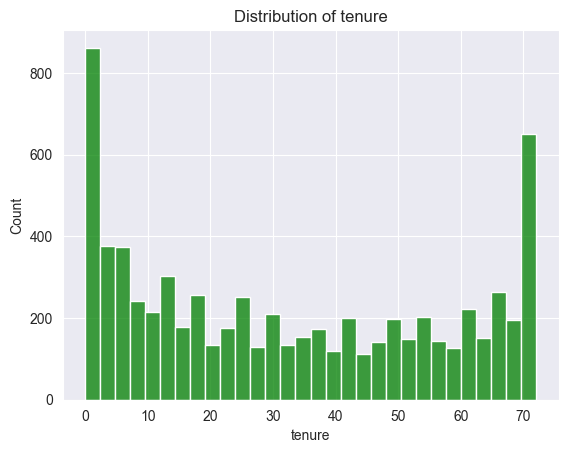

In [21]:
'''
Build a histogram for the 'tenure' column:
a. Set the number of bins to be 30
b. Set the color of the bins to be 'green'
c. Assign the title 'Distribution of tenure'
'''

sns.histplot(data=df, x='tenure', bins=30, color='green')
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

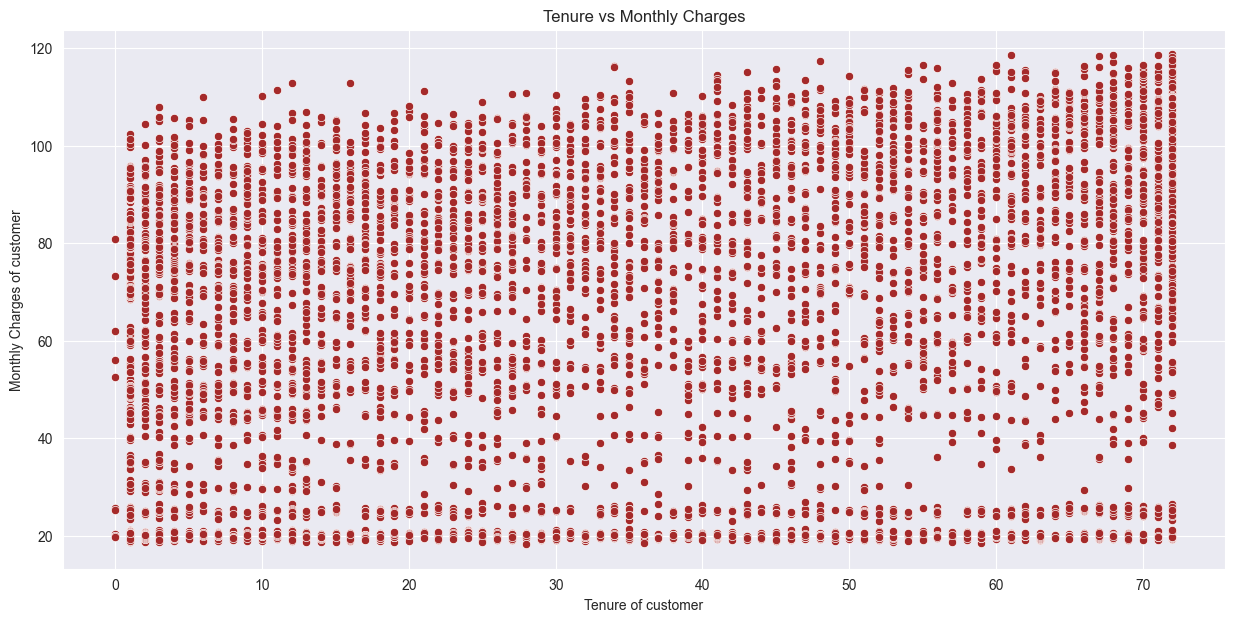

In [22]:
'''
Build a scatter plot between 'MonthlyCharges' and 'tenure'. Map 'MonthlyCharges' to the y-axis and 'tenure' to the x-axis:
a. Assign the points a color of 'brown'
b. Set the x-axis label to 'Tenure of customer'
c. Set the y-axis label to 'Monthly Charges of customer'
d. Set the title to 'Tenure vs Monthly Charges'

Build a box plot between 'tenure' & 'Contract'. Map 'tenure' on the y-axis and 'Contract' on the x-axis.
'''
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

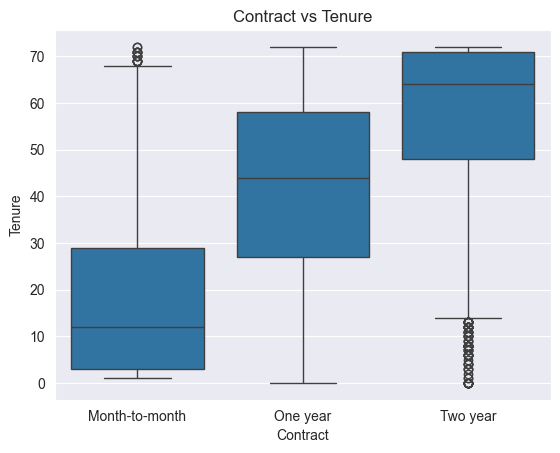

In [45]:
sns.boxplot(x = df['Contract'], y = df['tenure'])
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Contract vs Tenure')
plt.show()

### <span style="color:aqua">3. Linear Regression

In [23]:
'''
Linear Regression:
Build a simple linear model where the dependent variable is 'MonthlyCharges' and the independent variable is 'tenure':
a. Divide the dataset into train and test sets in a 70:30 ratio.
b. Build the model on the train set and predict the values on the test set.
c. After predicting the values, find the root mean square error.
d. Find out the error in prediction and store the result in 'error'.
e. Find the root mean square error.
'''

"\nLinear Regression:\nBuild a simple linear model where the dependent variable is 'MonthlyCharges' and the independent variable is 'tenure':\na. Divide the dataset into train and test sets in a 70:30 ratio.\nb. Build the model on the train set and predict the values on the test set.\nc. After predicting the values, find the root mean square error.\nd. Find out the error in prediction and store the result in 'error'.\ne. Find the root mean square error.\n"

In [24]:
linR_df= df[['tenure', 'MonthlyCharges']]
linR_df.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(linR_df['tenure'], linR_df['MonthlyCharges'], test_size=0.30, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
linR_model= LinearRegression()
linR_model.fit(np.array(X_train).reshape((-1,1)), np.array(y_train).reshape((-1,1)))

LinearRegression()

In [32]:
predictions= linR_model.predict(np.array(X_test).reshape((-1,1)))
print(predictions)

[[55.10659011]
 [67.43520921]
 [70.82557946]
 ...
 [73.29130328]
 [60.96268418]
 [61.57911514]]


In [33]:
linR_df['y_hat']= linR_model.predict(np.array(linR_df['tenure']).reshape((-1,1)))

In [34]:
linR_df.head()

,tenure,MonthlyCharges,y_hat
0,1,29.85,55.106590
1,34,56.95,65.277701
2,2,53.85,55.414806
3,45,42.30,68.668071
4,2,70.70,55.414806


Text(0.5, 1.0, 'Line Plot of MonthlyCharges and Predicted Values')

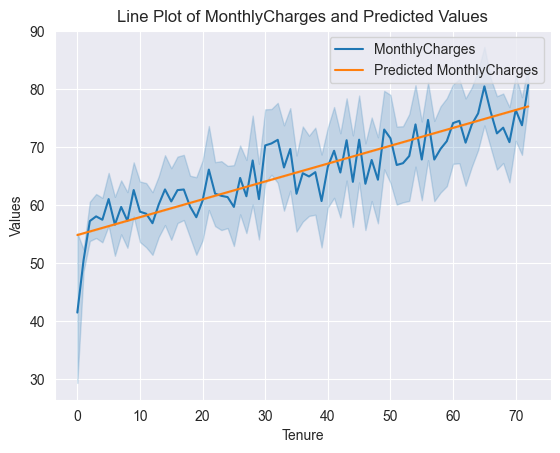

In [35]:
# Plot 'MonthlyCharges'
sns.lineplot(x=linR_df['tenure'], y=linR_df['MonthlyCharges'], label='MonthlyCharges')

# Plot 'y_hat'
sns.lineplot(x=linR_df['tenure'], y=linR_df['y_hat'], label='Predicted MonthlyCharges')

# Set x-axis label
plt.xlabel('Tenure')

# Set y-axis label
plt.ylabel('Values')

# Set the title of the plot
plt.title('Line Plot of MonthlyCharges and Predicted Values')

In [41]:
from sklearn.metrics import mean_squared_error
mean_err= mean_squared_error(y_pred=predictions, y_true=y_test)
error= np.sqrt(mean_err)

In [42]:
print('Root Mean Squared Error=', round(error, 2))

Root Mean Squared Error= 29.08


### <span style="color:aqua">4. Logistic Regression

In [ ]:
'''
a. Divide the dataset into train and test sets in a 65:35 ratio.

b. Build the model on the train set and predict the values on the test set.

c. Build the confusion matrix and get the accuracy score.

d. Build a multiple logistic regression model where the dependent variable is 'Churn' and independent variables are 'tenure' and 'MonthlyCharges'.

e. Divide the dataset into an 80:20 ratio.

f. Build the model on the train set and predict the values on the test set.

g. Build the confusion matrix and get the accuracy score.
'''


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
from sklearn.linear_model import LogisticRegression

X = np.array(df[['MonthlyCharges']]).reshape(-1,1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)


logR_model = LogisticRegression()
logR_model.fit(X_train, y_train)

LogisticRegression()

In [47]:
pred= logR_model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test,pred)
acc_score = accuracy_score(y_test, pred)

print("Confusion matrix = \n", conf_matrix)
print("Accuracy Score = ", acc_score)

Confusion matrix = 
 [[1797    0]
 [ 669    0]]
Accuracy Score =  0.7287104622871047


In [50]:
X = df[['tenure','MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

multi_log = LogisticRegression()
multi_log.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = multi_log.predict(X_test)

multi_cm = confusion_matrix(y_test, y_pred)
multi_acc  = accuracy_score(y_test,y_pred)

print("Confusion Matrix (Multiple Logistic Regression): \n", multi_cm)
print("Accuracy Score (Multiple Logistic Regression): ",multi_acc)

Confusion Matrix (Multiple Logistic Regression): 
 [[944  92]
 [193 180]]
Accuracy Score (Multiple Logistic Regression):  0.7977288857345636


### <span style="color:aqua">5. Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
X = np.array(df['tenure']).reshape(-1,1)
y = df['Churn']

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred = dt_model.predict(X_test)

# Calculating confusion matrix and model accuracy score
dt_cm = confusion_matrix(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
print("Confusion matrix (Decision Tree Classifier): \n", dt_cm)
print("Accuracy Score (Decision Tree Classifier): ", dt_acc)

Confusion matrix (Decision Tree Classifier): 
 [[841 195]
 [199 174]]
Accuracy Score (Decision Tree Classifier):  0.7203690560681334


### <span style="color:aqua">5. Random Forest

In [ ]:
'''
a. Divide the dataset into train and test sets in a 70:30 ratio.

b. Build the model on the train set and predict the values on the test set.

c. Build the confusion matrix and calculate the accuracy.
'''


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
X = df[['tenure','MonthlyCharges']]
y = df['Churn']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
y_pred = rf_model.predict(X_test)

In [59]:
rf_cm = confusion_matrix(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
print("Confusion matrix (Random Forest Classifier): \n",rf_cm)
print("Accuracy Score (Random Forest Classifier): ",rf_acc)

Confusion matrix (Random Forest Classifier): 
 [[1329  210]
 [ 309  265]]
Accuracy Score (Random Forest Classifier):  0.7543776620918126
